In [1]:
import oracles
import methods
import numpy as np
from plot_trajectory_2d import plot_levels, plot_trajectory
import matplotlib.pyplot as plt

In [2]:
def make_quad_func(k_max, k_min=1):
    A = np.diag([k_max, k_min])
    b = np.random.random(2)
    theta = np.random.random()*2*np.pi

    S = np.array([[np.cos(theta), -np.sin(theta)],
                         [np.sin(theta),  np.cos(theta)]])
    return oracles.QuadraticOracle(S @ A @ S.T, b)

In [3]:
k_max = 1
qoracle = make_quad_func(k_max)
gd = methods.GradientDescent(qoracle, np.random.random(2)*10,
                             line_search_options=methods.LineSearchTool('Constant'))

In [4]:
hist = gd.run()

Text(0.5, 1.0, 'k_max=1, k_min=1, Constant')

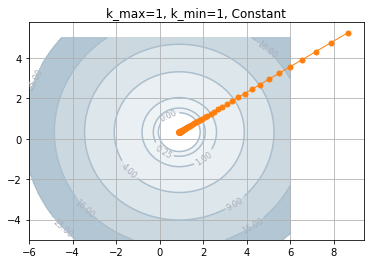

In [5]:
plot_levels(qoracle.func)
plot_trajectory(qoracle.func, hist['x'])
plt.title('k_max={}, k_min=1, Constant'.format(str(k_max)))

In [6]:
qoracle = make_quad_func(k_max)
gd = methods.GradientDescent(qoracle, np.random.random(2)*10,
                             line_search_options=methods.LineSearchTool('Armijo'))

Text(0.5, 1.0, 'k_max=1, k_min=1, Armijo')

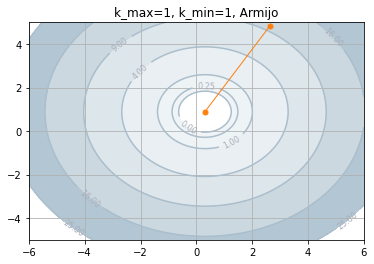

In [7]:
hist = gd.run()
plot_levels(qoracle.func)
plot_trajectory(qoracle.func, hist['x'])
plt.title('k_max={}, k_min=1, Armijo'.format(str(k_max)))

In [8]:
qoracle = make_quad_func(k_max)
gd = methods.GradientDescent(qoracle, np.random.random(2)*30,
                             line_search_options=methods.LineSearchTool('Wolfe'))


Text(0.5, 1.0, 'k_max=1, k_min=1, Wolfe')

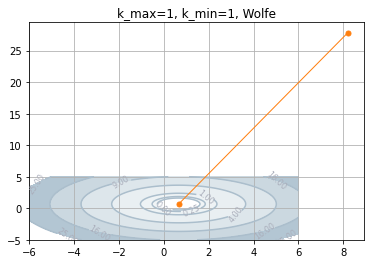

In [9]:
hist = gd.run()
plot_levels(qoracle.func)
plot_trajectory(qoracle.func, hist['x'])
plt.title('k_max={}, k_min=1, Wolfe'.format(str(k_max)))

In [44]:
k_max = 20
qoracle = make_quad_func(k_max)
x_0 = np.random.random(2)*30
gd = methods.GradientDescent(qoracle, x_0, tolerance=1e-9,
                             line_search_options=methods.LineSearchTool('Constant'))


Text(0.5, 1.0, 'k_max=20, k_min=1, Constant')

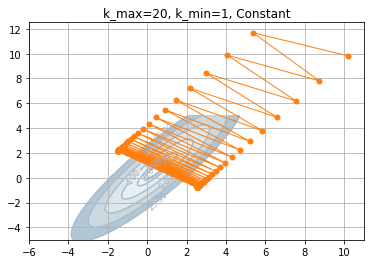

In [45]:
hist = gd.run()
plot_levels(qoracle.func)
plot_trajectory(qoracle.func, hist['x'])
plt.title('k_max={}, k_min=1, Constant'.format(str(k_max)))

In [46]:
gd = methods.GradientDescent(qoracle, x_0,
                             line_search_options=methods.LineSearchTool('Armijo'))

Text(0.5, 1.0, 'k_max=20, k_min=1, Armijo')

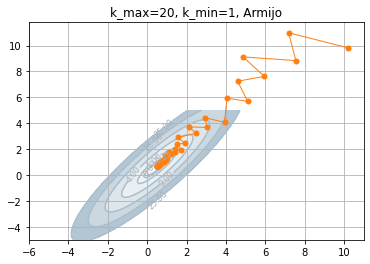

In [47]:
hist = gd.run()
plot_levels(qoracle.func)
plot_trajectory(qoracle.func, hist['x'])
plt.title('k_max={}, k_min=1, Armijo'.format(str(k_max)))

In [48]:
gd = methods.GradientDescent(qoracle, x_0,
                             line_search_options=methods.LineSearchTool('Wolfe'))


Text(0.5, 1.0, 'k_max=20, k_min=1, Wolfe')

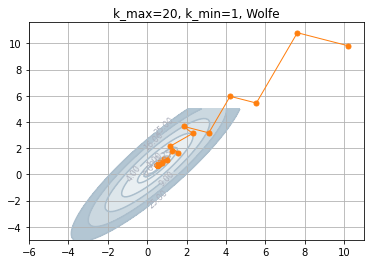

In [49]:
hist = gd.run()
plot_levels(qoracle.func)
plot_trajectory(qoracle.func, hist['x'])
plt.title('k_max={}, k_min=1, Wolfe'.format(str(k_max)))

Вывод:

Можно заметить, что Constant методу необходимо больше итераций, чтобы сойтись, а отсутствие адаптации может вообще не дать спуститься спуститься. Данный метод плохо ведет себя при повышении степени обусловленности. Методы  Armijo и Wolfe работают стабильно хорошо. Метод  превосходит Wolfe превосходит Armijo. Особенно при большой обусловленности. Обусловленность влияет на сходимость

In [18]:
def make_quad_func_n_dim(k_max, n_dim, k_min=1):
    A = np.diag([k_max]+ list(np.random.random(n_dim-2)) +[k_min])
    b = np.random.random(n_dim)
    S = np.eye(n_dim)
    for _ in range(max(100, n_dim)):
        nx = np.random.randint(n_dim, size=2)
        theta = np.random.random()*2*np.pi
        S0 = np.eye(n_dim)
        S0[nx[0]][nx[0]] = np.cos(theta)
        S0[nx[1]][nx[1]] =np.cos(theta)
        S0[nx[0]][nx[1]] = -np.sin(theta)
        S0[nx[1]][nx[0]] = np.sin(theta)
        S = S @ S0
    return oracles.QuadraticOracle(S @ A @ S.T, b)

In [19]:
ns = {10: {}, 100: {}, 500: {}}
for n in [10, 100, 500]:
    print(n)
    ks = {1: [], 5: [], 7: [], 10: [], 15: []}
    for k in ks.keys():
        for _ in range(5):
            qoracle_n  = make_quad_func_n_dim(k, n)
            x_0 = np.random.random(n)*100
            gd = methods.GradientDescent(qoracle_n, x_0,
                                     line_search_options=methods.LineSearchTool('Armijo'), tolerance=1e-10)
            hist = gd.run(max_iter=5000)
#             print()
            ks[k].append(len(hist['func']))
            
    ns[n] = ks.copy()

10
100
500


In [20]:
ns[10]

{1: [5001, 3094, 5001, 3021, 5001],
 5: [5001, 1157, 2870, 5001, 1195],
 7: [5001, 5001, 5001, 2264, 5001],
 10: [5001, 5001, 5001, 446, 5001],
 15: [5001, 744, 5001, 5001, 5001]}

Text(0.5, 1.0, 'n=10')

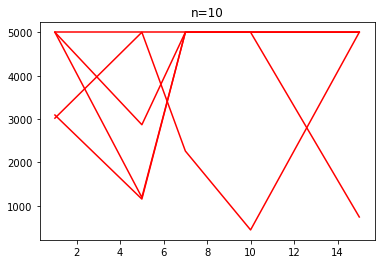

In [21]:
for ix in range(5):
    plt.plot(list(ns[10].keys()), [ns[10][k][ix] for k in ns[10].keys()], color='r')
plt.title('n=10')
plt.ylabel('количество итераций')
plt.xlabel('k_max');

Text(0.5, 1.0, 'n=100')

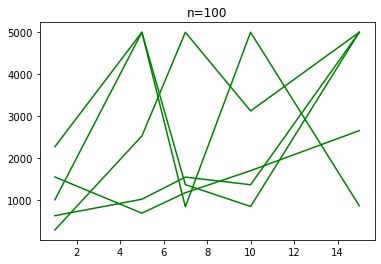

In [22]:
for ix in range(5):
    plt.plot(list(ns[100].keys()), [ns[100][k][ix] for k in ns[100].keys()], color='g')
plt.title('n=100')
plt.ylabel('количество итераций')
plt.xlabel('k_max');

In [ ]:
for ix in range(5):
    plt.plot(list(ns[500].keys()), [ns[500][k][ix] for k in ns[500].keys()], color='b')
plt.title('n=500')

Вывод

Большая размерность и большая обусловленность мешают быстрой сходимости (сходятся за большее число итераций)